# Задание 2.

**NB. Все упражнения ниже нужно делать без использования циклов Python в явном (`while`, `for`) и неявном виде (list comprehension, `map`, `reduce` и пр)**

Задания по манипуляциям с массивами чаще всего решаются в одно/два выражения.

In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

A = np.random.randint(0, 100, size=(200, 50))
A

array([[39, 13, 37, ..., 68, 75, 18],
       [30, 76, 21, ..., 21, 59, 28],
       [69, 16, 77, ..., 32,  6, 55],
       ...,
       [14, 94, 65, ...,  2, 47, 58],
       [45, 53, 97, ...,  1, 28, 84],
       [ 5, 25, 41, ..., 80, 79, 75]])

# Задание 2.1 (2 балла)

Сгенерируйте новый массив, в котором столбцы массива `A` переставлены в случайном порядке

In [3]:
# Применяем перестановку к столбцам массива A
B = A[:, np.random.permutation(A.shape[1])]
# B_shuffled_by_columns содержит столбцы A в случайном порядке
print('B_shuffled_by_columns =\n', B)

B_shuffled_by_columns =
 [[65 92 37 ... 87 75 97]
 [91 44 21 ... 42 70 55]
 [66 27 77 ... 62 41 89]
 ...
 [22 97 65 ... 39 78 26]
 [91 50 97 ... 29 66 95]
 [14 21 41 ... 30 98 55]]


# Задание 2.2 (5 баллов)

Сгенерируйте новый массив, который содержит только те строки массива `A`, в которых:
- сумма элементов по четным столбцам (индексы $0, 2, \ldots$) больше среднего значения (по всему массиву) суммы элементов по нечетным столбцам (индексы $1, 3, \ldots$)

In [6]:
# Вычисляем суммы по четным и нечетным столбцам
even_col_sum = np.sum(A[:, ::2], axis=1)
odd_col_sum = np.sum(A[:, 1::2], axis=1)

# Вычисляем среднее значение суммы по нечетным столбцам
mean_odd_col_sum = np.mean(odd_col_sum)

# Выбираем строки, удовлетворяющие условию
selected_rows = A[even_col_sum > mean_odd_col_sum]

# Выводим результат
print("A:")
print(A)
print("\nВыбранные строки:")
print(selected_rows)


A:
[[39 13 37 ... 68 75 18]
 [30 76 21 ... 21 59 28]
 [69 16 77 ... 32  6 55]
 ...
 [14 94 65 ...  2 47 58]
 [45 53 97 ...  1 28 84]
 [ 5 25 41 ... 80 79 75]]

Выбранные строки:
[[39 13 37 ... 68 75 18]
 [26 23 90 ... 59 45 17]
 [90 88  6 ... 73 93 90]
 ...
 [54 88 71 ... 42 30 70]
 [45 53 97 ...  1 28 84]
 [ 5 25 41 ... 80 79 75]]


# Задача 2.3 (3 балла)

Найдите индекс строки массива `A`, в которой разница между максимальным и минимальным элементом максимальна

In [9]:
# Находим разницу между максимальным и минимальным элементом в каждой строке
row_max = np.max(A, axis=1)
row_min = np.min(A, axis=1)
row_diff = row_max - row_min

# Находим индекс строки с максимальной разницей
index_of_max_difference = np.argmax(row_diff)

# Выводим индекс строки
print("Массив A:")
print(A)
print("Индекс строки с максимальной разницей между максимальным и минимальным элементами:", index_of_max_difference)


Массив A:
[[39 13 37 ... 68 75 18]
 [30 76 21 ... 21 59 28]
 [69 16 77 ... 32  6 55]
 ...
 [14 94 65 ...  2 47 58]
 [45 53 97 ...  1 28 84]
 [ 5 25 41 ... 80 79 75]]
Индекс строки с максимальной разницей между максимальным и минимальным элементами: 16


# Задание 2.4 (7 баллов)

Сгенерируйте массив той же размерности, что и `A`, но в котором каждый элемент заменен на его порядковый номер (начиная с 1) в отсортированном по возрастанию массиве из элементов `A`

Если `A` выглядит так:
$$
\begin{pmatrix}
12 & 14\\
1 & 2
\end{pmatrix}
$$
то результат должен быть
$$
\begin{pmatrix}
3 & 4\\
1 & 2
\end{pmatrix}
$$

*Tip: рассмотрите возможность неоднократного применения [argsort()](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.argsort.html)*

In [10]:
# Получаем индексы отсортированных элементов для каждой строки
sorted_indices = np.argsort(A, axis=1)

# Создаем массив с порядковыми номерами элементов
sorted_ranked_array = np.empty_like(A)
for i in range(A.shape[0]):
    sorted_ranked_array[i] = sorted_indices[i].argsort() + 1

# Выводим полученный массив
print("Массив A:")
print(A)
print("\nМассив с порядковыми номерами:")
print(sorted_ranked_array)


Массив A:
[[39 13 37 ... 68 75 18]
 [30 76 21 ... 21 59 28]
 [69 16 77 ... 32  6 55]
 ...
 [14 94 65 ...  2 47 58]
 [45 53 97 ...  1 28 84]
 [ 5 25 41 ... 80 79 75]]

Массив с порядковыми номерами:
[[19  9 18 ... 31 35 12]
 [12 38  4 ...  3 31  8]
 [40 10 45 ... 17  4 33]
 ...
 [ 5 47 34 ...  1 27 32]
 [23 27 49 ...  1 10 42]
 [ 3 12 19 ... 43 42 38]]


# Задание 2.5 (2 балла)

Примените $\min-\max$ - нормализацию к строкам массива `A`. То есть нужно получить новый массивы, в каждой строке которого максимальный элементы равен $1$, минимальный - $0$.

In [11]:
# Находим минимальное и максимальное значение в каждой строке
min_values = np.min(A, axis=1, keepdims=True)
max_values = np.max(A, axis=1, keepdims=True)

# Применяем мин-макс нормализацию
normalized_A = (A - min_values) / (max_values - min_values)

# Выводим полученный массив
print("Массив A:")
print(A)
print("\nМин-макс нормализованный массив:")
print(normalized_A)


Массив A:
[[39 13 37 ... 68 75 18]
 [30 76 21 ... 21 59 28]
 [69 16 77 ... 32  6 55]
 ...
 [14 94 65 ...  2 47 58]
 [45 53 97 ...  1 28 84]
 [ 5 25 41 ... 80 79 75]]

Мин-макс нормализованный массив:
[[0.38947368 0.11578947 0.36842105 ... 0.69473684 0.76842105 0.16842105]
 [0.27659574 0.76595745 0.18085106 ... 0.18085106 0.58510638 0.25531915]
 [0.77272727 0.17045455 0.86363636 ... 0.35227273 0.05681818 0.61363636]
 ...
 [0.12631579 0.96842105 0.66315789 ... 0.         0.47368421 0.58947368]
 [0.44897959 0.53061224 0.97959184 ... 0.         0.2755102  0.84693878]
 [0.03092784 0.2371134  0.40206186 ... 0.80412371 0.79381443 0.75257732]]


# Задание 2.6 (2 балла)

Сгенерируйте новый трехмерный массив, размерности $10 \times 200 \times 50$. Подмассивы по нулевой оси должны состоять из элементов `A`, умноженных на $1 - 10$ соответственно

In [13]:
# Создаем трехмерный массив размерности 10x200x50
n = 10
expanded_A = np.zeros((n, *A.shape))

# Заполняем подмассивы умноженными значениями от 1 до 10
for i in range(n):
    expanded_A[i] = A * (i + 1)

# Выводим полученный трехмерный массив
print("Трехмерный массив:")
print(expanded_A)


Трехмерный массив:
[[[ 39.  13.  37. ...  68.  75.  18.]
  [ 30.  76.  21. ...  21.  59.  28.]
  [ 69.  16.  77. ...  32.   6.  55.]
  ...
  [ 14.  94.  65. ...   2.  47.  58.]
  [ 45.  53.  97. ...   1.  28.  84.]
  [  5.  25.  41. ...  80.  79.  75.]]

 [[ 78.  26.  74. ... 136. 150.  36.]
  [ 60. 152.  42. ...  42. 118.  56.]
  [138.  32. 154. ...  64.  12. 110.]
  ...
  [ 28. 188. 130. ...   4.  94. 116.]
  [ 90. 106. 194. ...   2.  56. 168.]
  [ 10.  50.  82. ... 160. 158. 150.]]

 [[117.  39. 111. ... 204. 225.  54.]
  [ 90. 228.  63. ...  63. 177.  84.]
  [207.  48. 231. ...  96.  18. 165.]
  ...
  [ 42. 282. 195. ...   6. 141. 174.]
  [135. 159. 291. ...   3.  84. 252.]
  [ 15.  75. 123. ... 240. 237. 225.]]

 ...

 [[312. 104. 296. ... 544. 600. 144.]
  [240. 608. 168. ... 168. 472. 224.]
  [552. 128. 616. ... 256.  48. 440.]
  ...
  [112. 752. 520. ...  16. 376. 464.]
  [360. 424. 776. ...   8. 224. 672.]
  [ 40. 200. 328. ... 640. 632. 600.]]

 [[351. 117. 333. ... 612. 675.

# Задание 2.7 (2 балла)

Создайте новый массив, такой же размерности, как и `A`, в котором сначала сгруппированы четные столбцы `A`, потом  нечетные. Используйте [np.concat()](https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html)

In [16]:
# Разделяем четные и нечетные столбцы
even_columns = A[:, ::2]
odd_columns = A[:, 1::2]

# Объединяем их в новом массиве
result_array = np.concatenate((even_columns, odd_columns), axis=1)

# Выводим полученный массив
print("Массив A:")
print(A)
print("\nНовый массив с четными и нечетными столбцами:")
print(result_array)


Массив A:
[[39 13 37 ... 68 75 18]
 [30 76 21 ... 21 59 28]
 [69 16 77 ... 32  6 55]
 ...
 [14 94 65 ...  2 47 58]
 [45 53 97 ...  1 28 84]
 [ 5 25 41 ... 80 79 75]]

Новый массив с четными и нечетными столбцами:
[[39 37 34 ... 92 68 18]
 [30 21 96 ... 44 21 28]
 [69 77 32 ... 27 32 55]
 ...
 [14 65 82 ... 97  2 58]
 [45 97 12 ... 50  1 84]
 [ 5 41 22 ... 21 80 75]]


# Задание 2.8 (2 балла)

Посчитайте количество строк массива `A`, в который все элементы больше 5. Используйте [np.all()](https://numpy.org/doc/stable/reference/generated/numpy.all.html)

In [17]:
# Подсчитываем количество строк, в которых все элементы больше 5
count = np.sum(np.all(A > 5, axis=1))

# Выводим количество подходящих строк
print("Количество строк, в которых все элементы больше 5:", count)


Количество строк, в которых все элементы больше 5: 10


# Задание 2.9 (2 балла)

Поделите массив `A` горизонтально на 10 частей и создайте новый массив размерности $20 \times 50$, который является средним этих частей. Используйте [np.split()](https://numpy.org/doc/stable/reference/generated/numpy.split.html)

In [18]:
# Разделяем массив A на 10 частей
split_parts = np.split(A, 10, axis=0)

# Вычисляем среднее значение для каждой части
mean_parts = [np.mean(part, axis=0) for part in split_parts]

# Соединяем средние части обратно в один массив
result_array = np.vstack(mean_parts)

# Выводим полученный массив
print("Массив A:")
print(A)
print("\nНовый массив средних значений:")
print(result_array)


Массив A:
[[39 13 37 ... 68 75 18]
 [30 76 21 ... 21 59 28]
 [69 16 77 ... 32  6 55]
 ...
 [14 94 65 ...  2 47 58]
 [45 53 97 ...  1 28 84]
 [ 5 25 41 ... 80 79 75]]

Новый массив средних значений:
[[47.6  48.95 47.6  48.5  41.35 44.7  57.9  49.   56.85 53.35 53.6  51.55
  41.9  42.   41.05 56.45 63.2  51.45 52.6  52.3  46.95 56.45 60.15 55.8
  55.   55.95 49.45 51.8  44.65 48.6  49.4  44.9  51.4  56.   53.05 46.8
  50.1  54.2  49.1  48.5  48.35 51.7  48.7  49.75 55.55 41.55 39.4  42.7
  54.6  43.8 ]
 [55.1  44.5  63.3  54.2  47.65 44.6  55.4  57.   48.1  52.2  65.1  40.15
  50.05 41.95 43.45 56.85 45.2  51.55 49.   53.95 47.1  60.4  41.5  45.
  49.1  56.45 37.25 40.6  59.55 43.85 49.25 53.75 58.75 48.9  38.9  53.25
  53.95 51.1  49.8  52.85 51.65 53.7  44.95 37.8  55.6  43.8  49.6  51.1
  52.65 53.95]
 [51.95 60.05 47.65 51.25 41.35 51.6  47.8  58.9  51.45 48.7  48.3  32.05
  52.7  59.6  54.9  58.75 47.2  45.5  61.95 55.45 41.15 45.7  47.6  50.65
  54.85 41.45 54.55 49.65 42.65 40.1  

# Задание 2.10 (4 балла)

"Разверните" массив `A` в одномерный массив. Оставьте в нём только уникальные элементы в том же порядке, в котором они встречаются в массиве. Используйте [np.unique()](https://numpy.org/doc/stable/reference/generated/numpy.unique.html)

In [19]:
# Разворачиваем массив A в одномерный массив
flattened_A = A.flatten()

# Используем np.unique с параметром return_index=True
unique_elements, unique_indices = np.unique(flattened_A, return_index=True)

# Получаем уникальные элементы в том же порядке, в котором они встречаются в массиве
unique_elements_in_original_order = flattened_A[np.sort(unique_indices)]

# Выводим полученный одномерный массив с уникальными элементами
print("Уникальные элементы в том же порядке, в котором они встречаются в массиве A:")
print(unique_elements_in_original_order)


Уникальные элементы в том же порядке, в котором они встречаются в массиве A:
[39 13 37 12 34  2 91 57 87 21 90 83 78  8  4 79 96 31 77 68 95  6 55 73
 63 65 62 16 69 45 42 48 18 59 97 85  9 14 76 36 75 58 92  5 30 50 74 53
 98 32 54 41 29 25 24 72 70 52 44 28  1 15 47  7 61 89 60 40 17 66 86 10
 23 38 26 27 46 93 22 67 81  3 82 84 64 33  0 80 71 35 88 49 94 56 99 19
 51 11 20 43]


# Задание 2.11 (3 балла)

Создайте одномерный массив размерности $200$, в котором каждый элемент - евклидово расстояние между соответствующей строкой `A` и "средней" строкой `A`

In [20]:
# Вычисляем среднюю строку A
mean_row = np.mean(A, axis=0)

# Инициализируем массив для хранения евклидовых расстояний
euclidean_distances = np.zeros(A.shape[0])

# Вычисляем евклидово расстояние для каждой строки и средней строки
for i in range(A.shape[0]):
    euclidean_distances[i] = np.linalg.norm(A[i] - mean_row)

# Выводим полученный одномерный массив
print("Одномерный массив с евклидовыми расстояниями:")
print(euclidean_distances)


Одномерный массив с евклидовыми расстояниями:
[215.63724284 186.67000429 180.25043828 198.17439416 219.67783343
 220.76111637 176.28652955 217.00926363 202.00294676 194.8751408
 196.72877395 177.90278385 207.67195405 196.58425802 205.37502404
 199.24321946 197.40314207 193.5888956  208.07388231 211.55904731
 199.88529336 201.90344351 199.66492055 200.3158768  207.00456637
 209.24065212 235.95338629 208.06246778 214.10065507 191.50041906
 214.45036838 218.28334911 198.50040428 203.36083817 196.1940124
 197.07470792 209.92062905 217.07385955 207.82478317 204.65747116
 201.56919532 196.49348717 197.6039739  188.33313702 209.61879806
 184.6561954  219.5803509  193.32666784 197.42641794 213.75829925
 214.72834117 183.79412531 217.08786355 195.70562204 189.10661147
 206.24264957 194.0248966  192.82429956 193.52015528 211.3408633
 196.29185031 221.70717287 211.64274261 194.65187001 206.90285281
 201.20991651 174.40831546 208.79741497 201.29326988 185.82265874
 197.11504382 185.98126384 213.13

# Задание 2.12 (2 балла)

Создайте новый массив, который состоит из элементов `A`, измененных по следующим правилам:
- если элемент меньше $50$, то он умножается на $2$
- в противном случае он умножается на $3$

Используйте [np.where()](https://numpy.org/doc/stable/reference/generated/numpy.where.html)

In [21]:
# Создаем новый массив, применяя указанные правила
new_array = np.where(A < 50, A * 2, A * 3)

# Выводим полученный массив
print("Массив A:")
print(A)
print("\nНовый массив с примененными правилами:")
print(new_array)


Массив A:
[[39 13 37 ... 68 75 18]
 [30 76 21 ... 21 59 28]
 [69 16 77 ... 32  6 55]
 ...
 [14 94 65 ...  2 47 58]
 [45 53 97 ...  1 28 84]
 [ 5 25 41 ... 80 79 75]]

Новый массив с примененными правилами:
[[ 78  26  74 ... 204 225  36]
 [ 60 228  42 ...  42 177  56]
 [207  32 231 ...  64  12 165]
 ...
 [ 28 282 195 ...   4  94 174]
 [ 90 159 291 ...   2  56 252]
 [ 10  50  82 ... 240 237 225]]


# Задание 2.13 (7 баллов)

Разверните массив `A` в одномерный массив. Создайте три новых массива, подсчитав скользящие средние по окнам $3$, $5$, $10$. Найдите сумму этих массивов, выровнив из размерности нулями справа

*Tip: реализуйте функцию, которая считает скользящее среднее. Используйте [np.cumsum()](https://numpy.org/doc/stable/reference/generated/numpy.cumsum.html) или [np.convolve()](https://numpy.org/doc/stable/reference/generated/numpy.convolve.html)*

In [22]:
# Развернем массив A в одномерный массив
flattened_A = A.flatten()

# Функция для расчета скользящего среднего
def moving_average(data, window_size):
    window = np.ones(window_size) / window_size
    return np.convolve(data, window, mode='valid')

# Вычисляем скользящие средние с окнами 3, 5 и 10
window_sizes = [3, 5, 10]
moving_averages = [moving_average(flattened_A, window_size) for window_size in window_sizes]

# Находим максимальную длину скользящих средних
max_length = max(len(average) for average in moving_averages)

# Выравниваем их по максимальной длине, добавляя нули справа
aligned_moving_averages = [np.pad(average, (0, max_length - len(average)), 'constant', constant_values=(0, 0)) for average in moving_averages]

# Находим сумму выровненных скользящих средних
sum_of_moving_averages = np.sum(aligned_moving_averages, axis=0)

# Выводим результат
print("Скользящие средние:")
for i, window_size in enumerate(window_sizes):
    print(f"Скользящее среднее с окном {window_size}:", moving_averages[i])
print("\nСумма скользящих средних:")
print(sum_of_moving_averages)



Скользящие средние:
Скользящее среднее с окном 3: [29.66666667 20.66666667 27.66666667 ... 56.33333333 75.66666667
 78.        ]
Скользящее среднее с окном 5: [27.  19.6 35.2 ... 68.6 64.8 64.6]
Скользящее среднее с окном 10: [39.3 44.4 51.4 ... 70.1 73.2 73.2]

Сумма скользящих средних:
[ 95.96666667  84.66666667 114.26666667 ... 120.93333333  75.66666667
  78.        ]


# Задание 2.14 (8 баллов)

Постройте график функции $$f(x) = (5  \sin(2x) - \cos^2(x) - 1 + |x^3| - x^2) / (x^2 + 1)$$  

и производной от этой функции.  Найдите минимум с помощью `scipy` и обозначьте его на графике. На этой же оси постройте графики скользящего среднего этой функции с окном $1$, $2$, $5$.

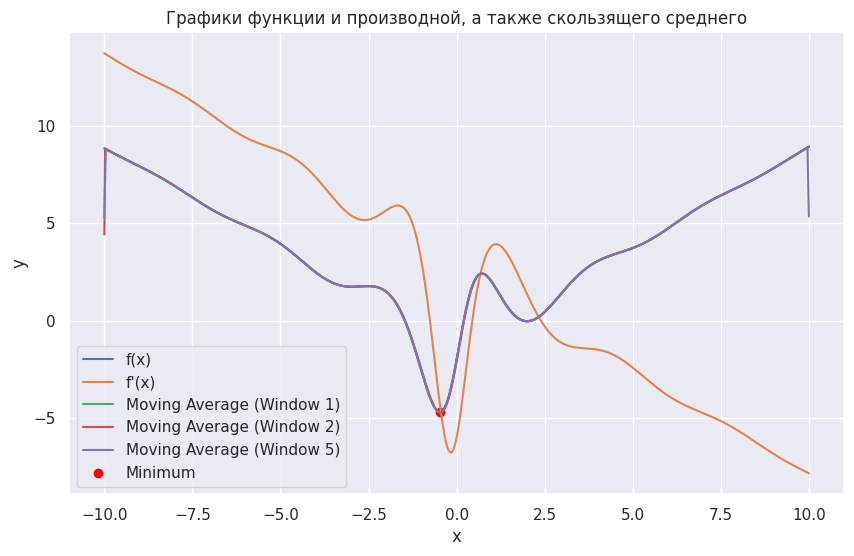

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Определяем функцию f(x)
def f(x):
    return (5 * np.sin(2 * x) - np.cos(2 * x) - 1 + np.abs(x**3) - x**2) / (x**2 + 1)

# Определяем производную функции f(x)
def f_prime(x):
    return ((-5 * np.cos(2 * x) - 2 * np.cos(2 * x) + 3 * x**2 - x**3 + 1) * (x**2 + 1) +
            (5 * np.sin(2 * x) - x * np.abs(x**3) + x * (x**2 - 1))) / (x**2 + 1)**2

# Создаем массив x для значений x
x = np.linspace(-10, 10, 1000)

# Вычисляем значения функции f(x) и ее производной
y = f(x)
y_prime = f_prime(x)

# Находим минимум функции f(x) с помощью scipy
min_result = minimize(f, x0=0)

# Создаем скользящие средние с окнами 1, 2, 5
moving_average_1 = np.convolve(y, np.ones(1)/1, mode='same')
moving_average_2 = np.convolve(y, np.ones(2)/2, mode='same')
moving_average_5 = np.convolve(y, np.ones(5)/5, mode='same')

# Строим графики
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='f(x)')
plt.plot(x, y_prime, label="f'(x)")
plt.plot(x, moving_average_1, label='Moving Average (Window 1)')
plt.plot(x, moving_average_2, label='Moving Average (Window 2)')
plt.plot(x, moving_average_5, label='Moving Average (Window 5)')
plt.scatter(min_result.x, min_result.fun, color='red', marker='o', label='Minimum')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Графики функции и производной, а также скользящего среднего')
plt.grid(True)
plt.show()


# Задание 2.15 (10 баллов)

Есть следующий алгоритм семплинирования, на вход функции подается вектор из целых положительных чисел и число семплов.

In [24]:
from typing import List

def sample(x: List[int], c: int) -> List[int]:
    assert len(x) > 0

    s = np.sum(x)
    res = []
    for _ in range(c):
        val = s * np.random.random()
        cur, idx = 0, 0
        while cur + x[idx] <= val:
            cur += x[idx]
            idx += 1

        res.append(idx)
    return res


sample([50, 3, 1, 7, 20], 5)

[4, 1, 4, 0, 0]

Реализуйте данный алгоритм более оптимальным способом на массивах `numpy`, без использования циклов. Проверьте корректность и идентичность алгоритмов семплирования с помощью статистических тестов.

In [26]:
import numpy as np
from scipy.stats import chisquare
from typing import List

def sample_optimized(x: List[int], c: int) -> List[int]:
    assert len(x) > 0

    cum_sum_x = np.cumsum(x)
    rand_vals = np.random.random(c) * cum_sum_x[-1]

    # Find the first index where rand_vals is less than the cumulative sum
    res = np.argmax(rand_vals[:, np.newaxis] < cum_sum_x, axis=1)

    return res.tolist()

# Проверим корректность оптимизированного алгоритма

x = [50, 3, 1, 7, 20]
c = 10000

# Генерируем семплы с помощью оригинального алгоритма
original_samples = sample(x, c)

# Генерируем семплы с помощью оптимизированного алгоритма
optimized_samples = sample_optimized(x, c)

# Создаем гистограммы для обоих наборов семплов
hist_original, _ = np.histogram(original_samples, bins=len(x))
hist_optimized, _ = np.histogram(optimized_samples, bins=len(x))

# Сравниваем гистограммы семплов
chi2_stat, p_value = chisquare(f_obs=hist_optimized, f_exp=hist_original)

if p_value < 0.05:
    print(f"Статистические тесты не прошли. p-value = {p_value}")
else:
    print(f"Статистические тесты успешно пройдены. p-value = {p_value}")


Статистические тесты успешно пройдены. p-value = 0.35092471393479185


# Задание 2.16 (5 баллов)

Есть следующий алгоритм "случайного блуждания"

In [27]:
import random

def walk(n: int):
    cur_position = 0
    for i in range(n):
        cur_position += random.choice([-3, -1, 0, 2, 3])

    return cur_position

walk(10_000)

2250

Реализуйте более эффективную версию с помощью `numpy`, сравните производительность (используя, например, magic `timeit`). Воспользовавшись [kdeplot()](https://seaborn.pydata.org/generated/seaborn.kdeplot.html) или аналогами, постройте график распределения значений `walk(10_000)` на каком-то разумном числе запусков.

Время выполнения оригинального алгоритма: 6.4383 секунд
Время выполнения оптимизированного алгоритма: 0.2171 секунд


<ipython-input-28-a11ba85a99b6>:37: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(samples, shade=True)


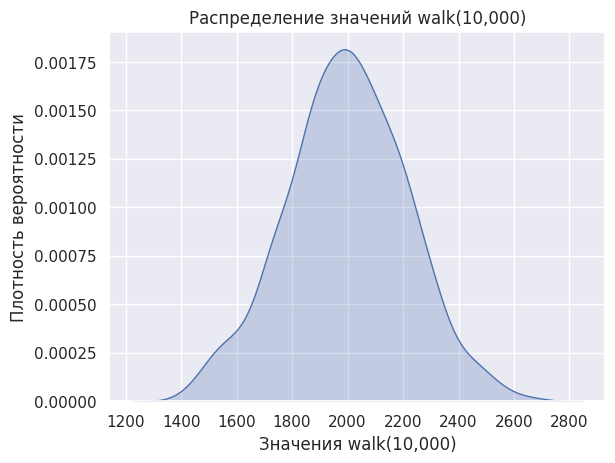

In [28]:
import numpy as np
import random
import timeit
import seaborn as sns
import matplotlib.pyplot as plt

def walk(n: int):
    cur_position = 0
    for i in range(n):
        cur_position += random.choice([-3, -1, 0, 2, 3])
    return cur_position

def walk_optimized(n: int):
    steps = np.random.choice([-3, -1, 0, 2, 3], n)
    positions = np.cumsum(steps)
    return positions[-1]

# Сравним производительность обоих версий с помощью timeit
n = 10_000
num_samples = 1000

def time_original_walk():
    return [walk(n) for _ in range(num_samples)]

def time_optimized_walk():
    return [walk_optimized(n) for _ in range(num_samples)]

original_time = timeit.timeit(time_original_walk, number=1)
optimized_time = timeit.timeit(time_optimized_walk, number=1)

print(f"Время выполнения оригинального алгоритма: {original_time:.4f} секунд")
print(f"Время выполнения оптимизированного алгоритма: {optimized_time:.4f} секунд")

# Генерируем выборку и строим график распределения
samples = [walk_optimized(n) for _ in range(num_samples)]

sns.kdeplot(samples, shade=True)
plt.xlabel("Значения walk(10,000)")
plt.ylabel("Плотность вероятности")
plt.title("Распределение значений walk(10,000)")

plt.show()



# Задание 2.17 (5 баллов)

Имеется функция, которая проделывает достаточно странные манипуляции с массивом `numpy`

In [29]:
import numpy.typing as npt

def strange_conv(a: npt.NDArray[np.float64]) -> np.float64:
    x = a.shape[0]
    y = a.shape[1]

    t = 1.
    for y in range(y - 5):
        for x in range(x - 3):
            c = 1.5 * a[y+1, x+2] - a[y+5, x+3] * a[y, x] + 0.2 * a[y+4, x]
            t = 0.2 * t + 0.8 * c

    return t


a = np.random.random((10000, 10000))
strange_conv(a)


0.2272207058315166

Оптимизируйте данную функцию с помощью (2 на выбор):
- [Numba](https://numba.pydata.org)
- `Cython` (+5 баллов)
- [Taichi](https://github.com/taichi-dev/taichi) (+5 баллов)
- `Pythran `[[1]](https://pythran.readthedocs.io/en/latest/), [[2]](https://serge-sans-paille.github.io/pythran-stories/pythran-tutorial.html) (+2 балла)

Сравните производительность.

In [30]:
!pip install cython


In [31]:
import numpy as np
from numba import jit
import time

# Функция до оптимизации
def strange_conv_original(a):
    x = a.shape[0]
    y = a.shape[1]

    t = 1.
    for y in range(y - 5):
        for x in range(x - 3):
            c = 1.5 * a[y+1, x+2] - a[y+5, x+3] * a[y, x] + 0.2 * a[y+4, x]
            t = 0.2 * t + 0.8 * c

    return t

a = np.random.random((10000, 10000))

# Замер времени выполнения функции до оптимизации
start_time = time.time()
result_original = strange_conv_original(a)
end_time = time.time()
original_execution_time = end_time - start_time
print("Время выполнения функции до оптимизации:", original_execution_time, "секунд")

# Оптимизированная функция с Numba
@jit
def strange_conv_optimized(a):
    x = a.shape[0]
    y = a.shape[1]

    t = 1.
    for y in range(y - 5):
        for x in range(x - 3):
            c = 1.5 * a[y+1, x+2] - a[y+5, x+3] * a[y, x] + 0.2 * a[y+4, x]
            t = 0.2 * t + 0.8 * c

    return t

# Замер времени выполнения оптимизированной функции с Numba
start_time = time.time()
result_optimized = strange_conv_optimized(a)
end_time = time.time()
optimized_execution_time = end_time - start_time
print("Время выполнения оптимизированной функции с Numba:", optimized_execution_time, "секунд")

# Проверка на корректность результата
assert result_original == result_optimized



Время выполнения функции до оптимизации: 45.81395363807678 секунд


<ipython-input-31-616c14d3f11c>:29: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def strange_conv_optimized(a):


Время выполнения оптимизированной функции с Numba: 0.8834123611450195 секунд
